In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize']=(6,4)
sns.set_palette('RdBu_r')
sns.set_style('whitegrid')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('insurance_fraud.csv')

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [6]:
df.AgentType.unique()

array(['External', 'Internal'], dtype=object)

In [7]:
df.shape

(15420, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [9]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [12]:
df = df.rename(columns={'FraudFound_P': 'FraudFound'})

In [13]:
# Statistics of quantitative variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [14]:
# Statistics of qualitative variables
df.describe(include=['O']).T

,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


In [15]:
df.AgeOfPolicyHolder.unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [16]:
# Minimum age was entered 0 for some policyholders
df.loc[df['Age']<16].count()[0]

320

In [17]:
df.loc[(df['Age']<16) & (df['FraudFound']==1)].count()[0]

31

In [18]:
# Changinage from 0 to 16 since upon closer inspection it looks like these policyholders are between 16-17
df['Age'] = df['Age'].replace(0,16)

In [19]:
df.MonthClaimed.unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [20]:
df.loc[df['MonthClaimed']=='0'].count()[0]

1

In [21]:
# Delete row that has MonthClaimed as '0' entered
df.drop(df.loc[df['MonthClaimed']=='0'].index, inplace=True)

In [22]:
# Dropping the columns that are not necessary for analysis
df.drop(['PolicyNumber','RepNumber','Year'], axis=1, inplace=True)

<Figure size 800x800 with 0 Axes>

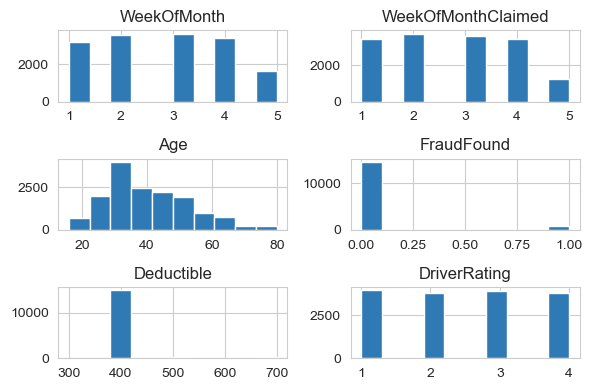

In [23]:
plt.figure(figsize=(8,8))
df.hist()
plt.tight_layout();

## EDA

In [24]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

In [25]:
df['FraudFound'].value_counts()

0    14496
1      923
Name: FraudFound, dtype: int64

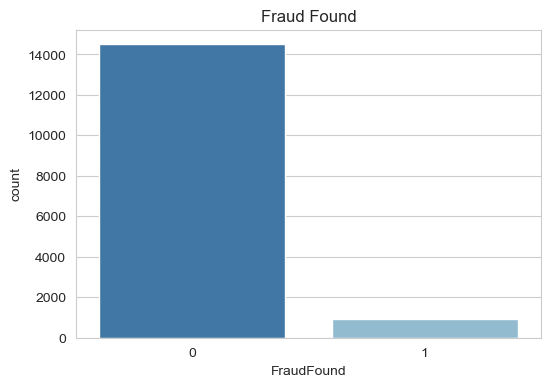

In [26]:
sns.countplot(data=df, x='FraudFound')
plt.title('Fraud Found');

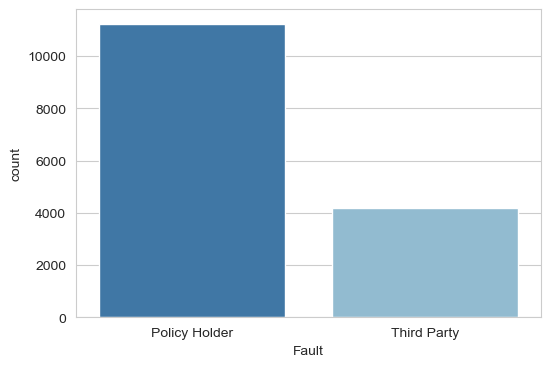

In [27]:
sns.countplot(data=df, x='Fault');

In [28]:
numeric = ['WeekOfMonth','WeekOfMonthClaimed', 'Age', 'Deductible', 'DriverRating',
           'Year']

for col in numeric:
    print(df.groupby('FraudFound')[col].mean())

FraudFound
0    2.792494
1    2.728061
Name: WeekOfMonth, dtype: float64
FraudFound
0    2.695916
1    2.665222
Name: WeekOfMonthClaimed, dtype: float64
FraudFound
0    40.277594
1    38.802817
Name: Age, dtype: float64
FraudFound
0    407.512417
1    410.725894
Name: Deductible, dtype: float64
FraudFound
0    2.485789
1    2.520043
Name: DriverRating, dtype: float64
FraudFound
0    1994.871551
1    1994.787649
Name: Year, dtype: float64


> There doesn't seem to be any distinction in any of the of numeric variables with Fraud and not Fraud

In [25]:
# Make a new dataframe with only fraud found rows

df_fraud = df.loc[df['FraudFound']==1]
df_fraud.shape

(923, 30)

In [26]:
# Statistics of the quantitative variables for Fraud Found data
df_fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,923.0,2.728061,1.280906,1.0,2.0,3.0,4.0,5.0
WeekOfMonthClaimed,923.0,2.665222,1.255596,1.0,2.0,3.0,4.0,5.0
Age,923.0,38.802817,12.631869,16.0,30.0,36.0,46.0,80.0
FraudFound,923.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Deductible,923.0,410.725894,46.619027,300.0,400.0,400.0,400.0,700.0
DriverRating,923.0,2.520043,1.123781,1.0,1.0,3.0,4.0,4.0


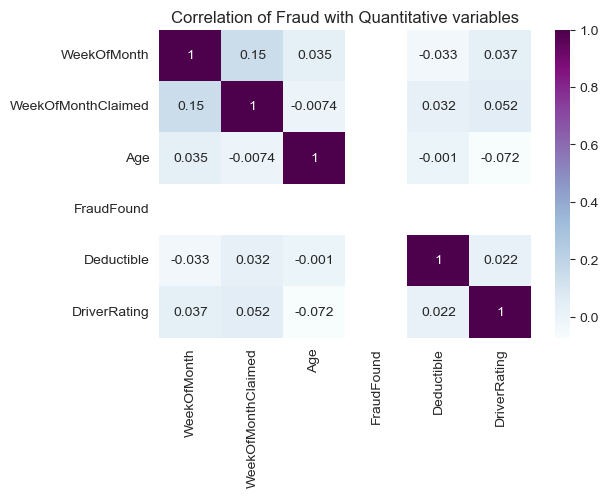

In [27]:
# Correlation of quantitative data
corr = df_fraud.corr()
sns.heatmap(data=corr, cmap='BuPu', annot=True)
plt.title('Correlation of Fraud with Quantitative variables');

In [28]:
# Statistics of the qualitative variables for Fraud Found data
df_fraud.describe(include=['O']).T

,count,unique,top,freq
Month,923,12,Mar,102
DayOfWeek,923,7,Monday,160
Make,923,15,Pontiac,213
AccidentArea,923,2,Urban,790
DayOfWeekClaimed,923,7,Monday,216
MonthClaimed,923,12,May,102
Sex,923,2,Male,818
MaritalStatus,923,4,Married,639
Fault,923,2,Policy Holder,886
PolicyType,923,6,Sedan - All Perils,411


In [29]:
# Select all numeric variables
numeric = df_fraud.select_dtypes(exclude=['object']).columns.tolist()
numeric

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'FraudFound',
 'Deductible',
 'DriverRating']

In [30]:
# Select all categorical variables
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [33]:
from scipy.stats import chi2_contingency
# Print all the features with p-values <= 0.05 alpha
print('P-values of the Features:\n')
for cols in df.columns:
    ct = pd.crosstab(df['FraudFound'], df[cols]) 
    if chi2_contingency(ct)[1]<= 0.05:
        print(cols,':', round(chi2_contingency(ct)[1],4))

P-values of the Features:

Month : 0.0017
Make : 0.0
AccidentArea : 0.0
MonthClaimed : 0.0
Sex : 0.0002
Age : 0.0003
Fault : 0.0
PolicyType : 0.0
VehicleCategory : 0.0
VehiclePrice : 0.0
FraudFound : 0.0
Deductible : 0.0
Days_Policy_Accident : 0.0209
PastNumberOfClaims : 0.0
AgeOfVehicle : 0.0025
AgeOfPolicyHolder : 0.0001
AgentType : 0.0066
NumberOfSuppliments : 0.0004
AddressChange_Claim : 0.0
BasePolicy : 0.0


Fraud by Gender
Male      88.624052
Female    11.375948
Name: Sex, dtype: float64


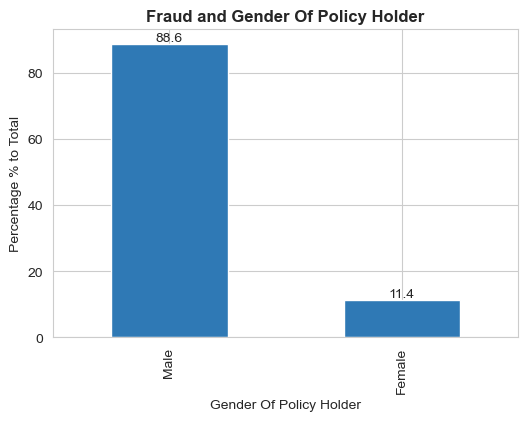

In [39]:
gender = ((df_fraud['Sex'].value_counts())/len(df_fraud['Sex']))*100
print('Fraud by Gender')
print(gender)


ax = gender.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Gender Of Policy Holder')
plt.title('Fraud and Gender Of Policy Holder',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

> Percent of fraud is significantly higher among men 

Fraud by Age Of Policy Holder
31 to 35    39.003250
36 to 40    25.677140
41 to 50    15.601300
51 to 65     7.583965
26 to 30     3.575298
16 to 17     3.358613
over 65      3.250271
21 to 25     1.733478
18 to 20     0.216685
Name: AgeOfPolicyHolder, dtype: float64


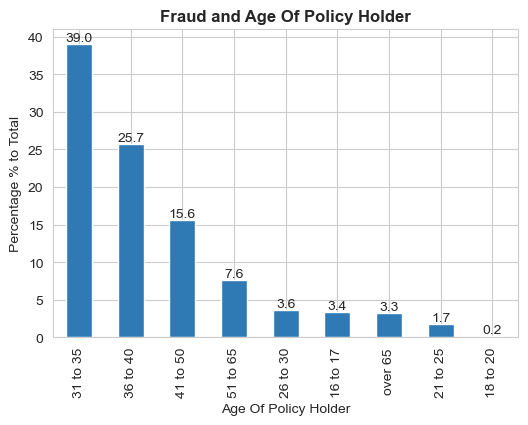

In [41]:
age = ((df_fraud['AgeOfPolicyHolder'].value_counts())/len(df_fraud['AgeOfPolicyHolder']))*100
print('Fraud by Age Of Policy Holder')
print(age)


ax = age.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Age Of Policy Holder')
plt.title('Fraud and Age Of Policy Holder',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

> Percent of fraud is highest in age group 31-35, and second highest in 36-40 age group  

Fraud by Marital Status
Married     69.230769
Single      30.119177
Divorced     0.325027
Widow        0.325027
Name: MaritalStatus, dtype: float64


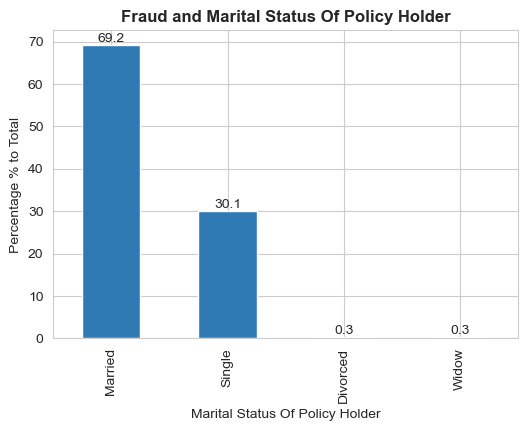

In [42]:
marital = ((df_fraud['MaritalStatus'].value_counts())/len(df_fraud['MaritalStatus']))*100
print('Fraud by Marital Status')
print(marital)

ax = marital.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Marital Status Of Policy Holder')
plt.title('Fraud and Marital Status Of Policy Holder',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

> 69% of people who had fraudulent claims were married

Fraud by Vehicle Make
Pontiac      23.076923
Toyota       20.151679
Honda        19.393283
Mazda        13.326111
Chevrolet    10.184182
Accura        6.392199
Ford          3.575298
Saab          1.191766
VW            0.866739
Saturn        0.650054
Mercury       0.650054
Dodge         0.216685
Nisson        0.108342
Mecedes       0.108342
BMW           0.108342
Name: Make, dtype: float64


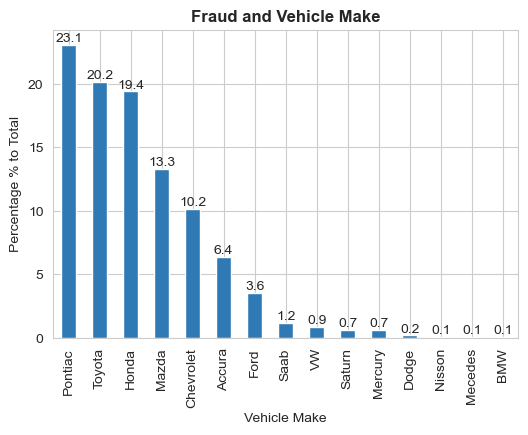

In [43]:
vehicle = ((df_fraud['Make'].value_counts())/len(df_fraud['Make']))*100
print('Fraud by Vehicle Make')
print(vehicle)


ax = vehicle.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Vehicle Make')
plt.title('Fraud and Vehicle Make',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by VehicleCategory
Sedan      86.132178
Sport       9.100758
Utility     4.767064
Name: VehicleCategory, dtype: float64


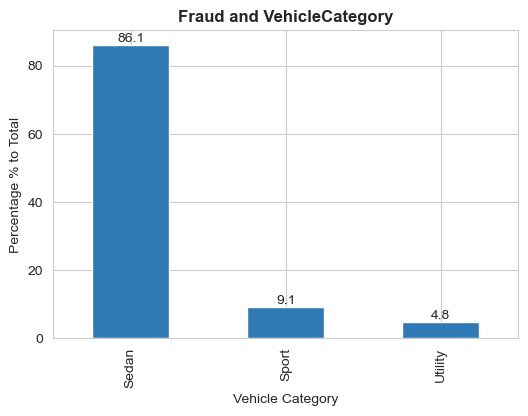

In [44]:
vehiclecat = ((df_fraud['VehicleCategory'].value_counts())/len(df_fraud['VehicleCategory']))*100
print('Fraud by VehicleCategory')
print(vehiclecat)


ax = vehiclecat.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Vehicle Category')
plt.title('Fraud and VehicleCategory',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Age Of Vehicle
7 years        35.211268
6 years        24.702059
more than 7    22.318527
5 years        10.292524
new             3.466956
4 years         2.275190
3 years         1.408451
2 years         0.325027
Name: AgeOfVehicle, dtype: float64


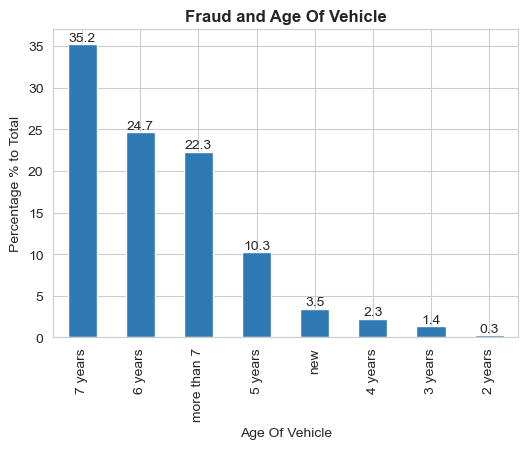

In [45]:
vehicleage=((df_fraud['AgeOfVehicle'].value_counts())/len(df_fraud['AgeOfVehicle']))*100
print('Fraud by Age Of Vehicle')
print(vehicleage)

ax=vehicleage.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Age Of Vehicle')
plt.title('Fraud and Age Of Vehicle',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

> Sedan is the most frequent vehicle type in fradulent claims

Fraud by Accident Area
Urban    85.590466
Rural    14.409534
Name: AccidentArea, dtype: float64


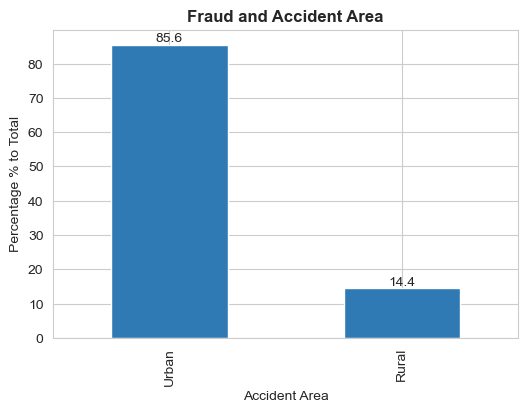

In [46]:
area = ((df_fraud['AccidentArea'].value_counts())/len(df_fraud['AccidentArea']))*100
print('Fraud by Accident Area')
print(area)

ax = area.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Accident Area')
plt.title('Fraud and Accident Area',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Month of Accident
Mar    11.050921
May    10.184182
Jan     9.425785
Aug     9.100758
Feb     8.884074
Jun     8.667389
Apr     8.667389
Sep     8.234020
Oct     7.583965
Dec     6.717226
Jul     6.500542
Nov     4.983749
Name: Month, dtype: float64


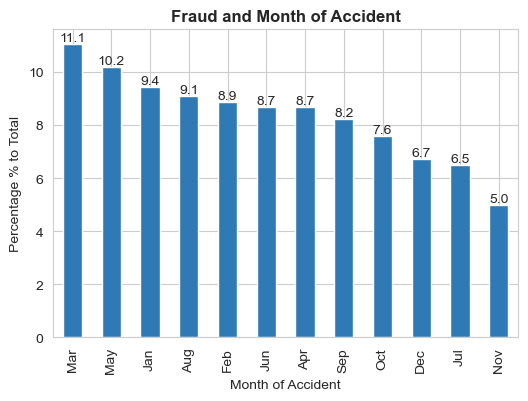

In [47]:
month_accident = ((df_fraud['Month'].value_counts())/len(df_fraud['Month']))*100
print('Fraud by Month of Accident')
print(month_accident)

ax = month_accident.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Month of Accident')
plt.title('Fraud and Month of Accident',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Month Claimed
May    11.050921
Mar    10.509209
Jan     9.967497
Aug     9.967497
Apr     8.884074
Sep     8.450704
Feb     8.450704
Jun     8.450704
Oct     7.908992
Jul     6.067172
Dec     5.308776
Nov     4.983749
Name: MonthClaimed, dtype: float64


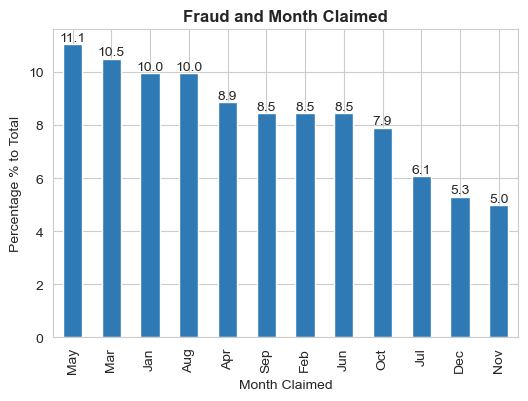

In [48]:
month_claimed = ((df_fraud['MonthClaimed'].value_counts())/len(df_fraud['MonthClaimed']))*100
print('Fraud by Month Claimed')
print(month_claimed)

ax = month_claimed.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Month Claimed')
plt.title('Fraud and Month Claimed',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

> Most Fraud is claimed in May

Fraud by Accident Week Of Month
2    24.377031
3    23.293608
1    21.668472
4    20.801733
5     9.859155
Name: WeekOfMonth, dtype: float64


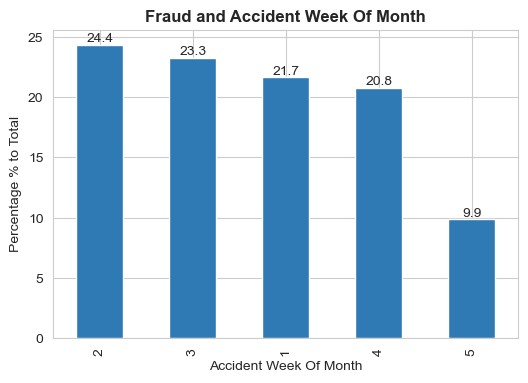

In [49]:
week_accident = ((df_fraud['WeekOfMonth'].value_counts())/len(df_fraud['WeekOfMonth']))*100
print('Fraud by Accident Week Of Month')
print(week_accident)

ax = week_accident.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Accident Week Of Month')
plt.title('Fraud and Accident Week Of Month',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Week Of Month Claimed
3    23.943662
1    23.835320
4    22.643554
2    22.535211
5     7.042254
Name: WeekOfMonthClaimed, dtype: float64


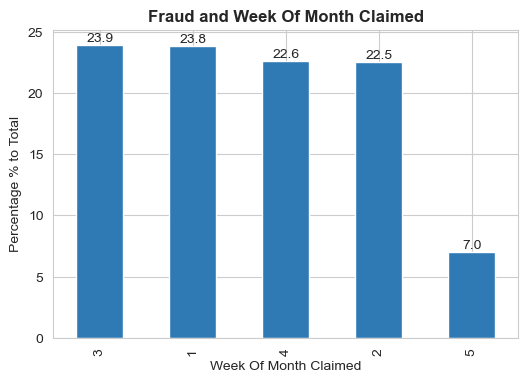

In [50]:
week_claimed = ((df_fraud['WeekOfMonthClaimed'].value_counts())/len(df_fraud['WeekOfMonthClaimed']))*100
print('Fraud by Week Of Month Claimed')
print(week_claimed)

ax = week_claimed.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Week Of Month Claimed')
plt.title('Fraud and Week Of Month Claimed',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

In [51]:
day_accident = ((df_fraud['DayOfWeek'].value_counts())/len(df_fraud['DayOfWeek']))*100
print('Fraud by Day')
print(day_accident)

Fraud by Day
Monday       17.334778
Friday       16.684724
Saturday     14.301192
Sunday       13.217768
Thursday     13.001083
Tuesday      13.001083
Wednesday    12.459372
Name: DayOfWeek, dtype: float64


Fraud by Day Of Week Claimed
Monday       23.401950
Tuesday      21.451788
Wednesday    20.368364
Friday       17.768147
Thursday     15.601300
Saturday      1.083424
Sunday        0.325027
Name: DayOfWeekClaimed, dtype: float64


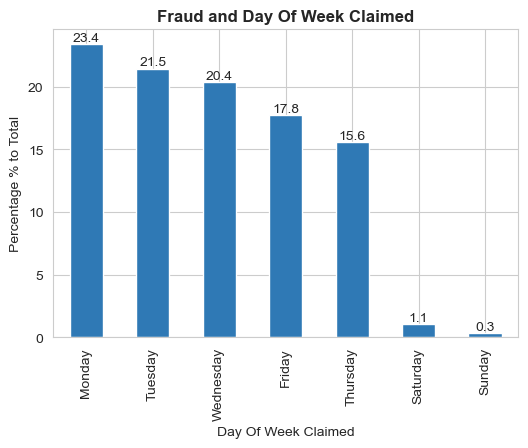

In [52]:
day_claimed = ((df_fraud['DayOfWeekClaimed'].value_counts())/len(df_fraud['DayOfWeekClaimed']))*100
print('Fraud by Day Of Week Claimed')
print(day_claimed)

ax = day_claimed.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Day Of Week Claimed')
plt.title('Fraud and Day Of Week Claimed',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

> Monday's were the highest Fraudulent Claims

Fraud by Police Report Filed
No     98.266522
Yes     1.733478
Name: PoliceReportFiled, dtype: float64


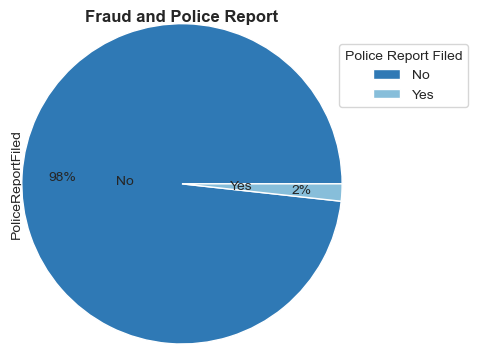

In [53]:
policereport = ((df_fraud['PoliceReportFiled'].value_counts())/len(df_fraud['PoliceReportFiled']))*100
print('Fraud by Police Report Filed')
print(policereport)

df_fraud.PoliceReportFiled.value_counts().plot(kind="pie", pctdistance=0.75, labeldistance=0.3,
                                        autopct='%1.0f%%', radius=1.3)
plt.title('Fraud and Police Report',fontweight="bold")
plt.legend(loc=(1.01,.75), title='Police Report Filed');

> 98% of Fraudulent claims did not have police reporting

Fraud by Witness Present
No     99.674973
Yes     0.325027
Name: WitnessPresent, dtype: float64


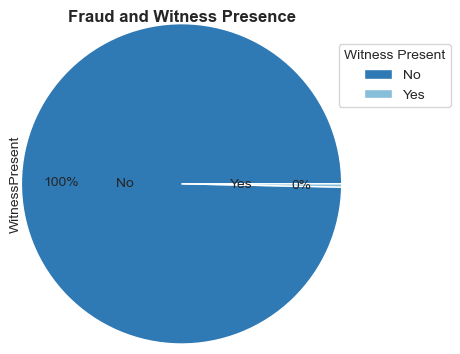

In [54]:
witness = ((df_fraud['WitnessPresent'].value_counts())/len(df_fraud['WitnessPresent']))*100
print('Fraud by Witness Present')
print(witness)

df_fraud.WitnessPresent.value_counts().plot(kind="pie", pctdistance=0.75, labeldistance=0.3,
                                        autopct='%1.0f%%', radius=1.3)
plt.title('Fraud and Witness Presence',fontweight="bold")
plt.legend(loc=(1.01,.75), title='Witness Present');

Fraud by Past Number Of Claims
none           36.728061
2 to 4         31.852654
1              24.052004
more than 4     7.367281
Name: PastNumberOfClaims, dtype: float64


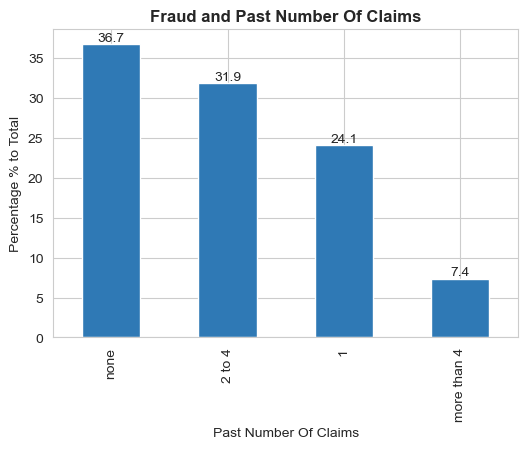

In [57]:
past_claims = ((df_fraud['PastNumberOfClaims'].value_counts())/len(df_fraud['PastNumberOfClaims']))*100
print('Fraud by Past Number Of Claims')
print(past_claims)

ax = past_claims.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Past Number Of Claims')
plt.title('Fraud and Past Number Of Claims',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Address Change Claim
no change         89.382449
2 to 3 years       5.525460
4 to 8 years       3.575298
1 year             1.191766
under 6 months     0.325027
Name: AddressChange_Claim, dtype: float64


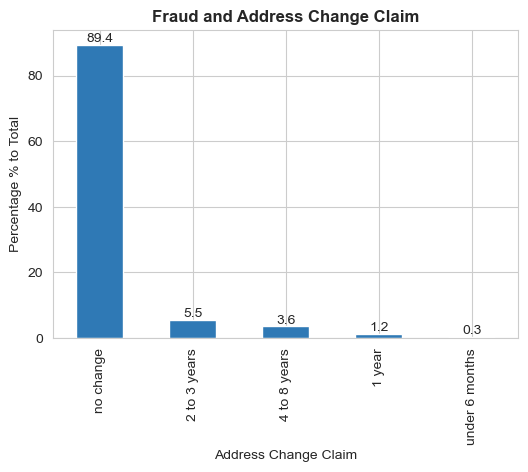

In [55]:
address_change = ((df_fraud['AddressChange_Claim'].value_counts())/len(df_fraud['AddressChange_Claim']))*100
print('Fraud by Address Change Claim')
print(address_change)

ax = address_change.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Address Change Claim')
plt.title('Fraud and Address Change Claim',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Number Of Cars
1 vehicle     92.091008
2 vehicles     4.658722
3 to 4         3.141928
5 to 8         0.108342
Name: NumberOfCars, dtype: float64


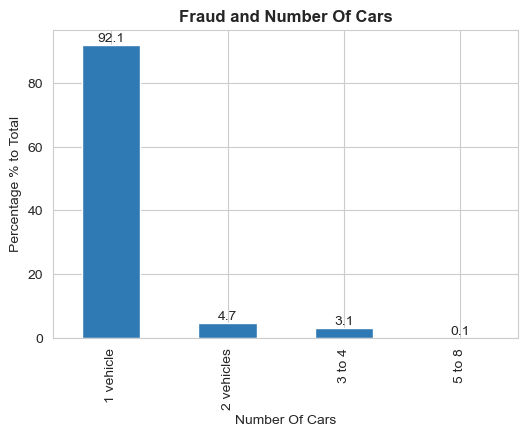

In [56]:
num_cars = ((df_fraud['NumberOfCars'].value_counts())/len(df_fraud['NumberOfCars']))*100
print('Fraud by Number Of Cars')
print(num_cars)

ax = num_cars.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Number Of Cars')
plt.title('Fraud and Number Of Cars',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Policy Type
Sedan - All Perils      44.528711
Sedan - Collision       41.603467
Sport - Collision        5.200433
Utility - All Perils     4.442037
Sedan - Liability        3.900325
Utility - Collision      0.325027
Name: PolicyType, dtype: float64


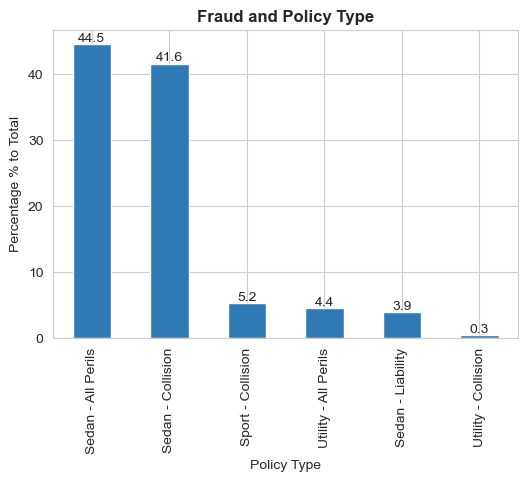

In [56]:
policy_type = ((df_fraud['PolicyType'].value_counts())/len(df_fraud['PolicyType']))*100
print('Fraud by Policy Type')
print(policy_type)

ax = policy_type.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Policy Type')
plt.title('Fraud and Policy Type',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Base Policy
All Perils    48.970748
Collision     47.128927
Liability      3.900325
Name: BasePolicy, dtype: float64


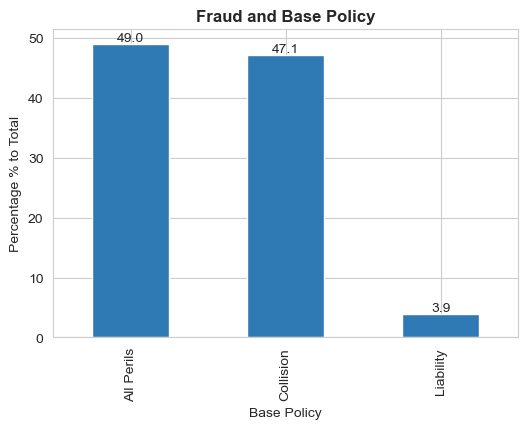

In [57]:
policy = ((df_fraud['BasePolicy'].value_counts())/len(df_fraud['BasePolicy']))*100
print('Fraud by Base Policy')
print(policy)

ax = policy.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Base Policy')
plt.title('Fraud and Base Policy',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

> Liability insurance policy is not linked to fradulent activity

Fraud by Agent Type
External    99.566631
Internal     0.433369
Name: AgentType, dtype: float64


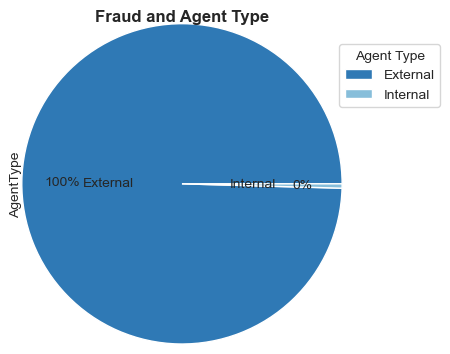

In [58]:
agent = ((df_fraud['AgentType'].value_counts())/len(df_fraud['AgentType']))*100
print('Fraud by Agent Type')
print(agent)


df_fraud.AgentType.value_counts().plot(kind="pie", pctdistance=0.75, labeldistance=0.3,
                                        autopct='%1.0f%%', radius=1.3)
plt.title('Fraud and Agent Type',fontweight="bold")
plt.legend(loc=(1.01,.75), title='Agent Type'); 

Fraud by Number Of Suppliments
none           51.137595
more than 5    21.126761
1 to 2         17.226436
3 to 5         10.509209
Name: NumberOfSuppliments, dtype: float64


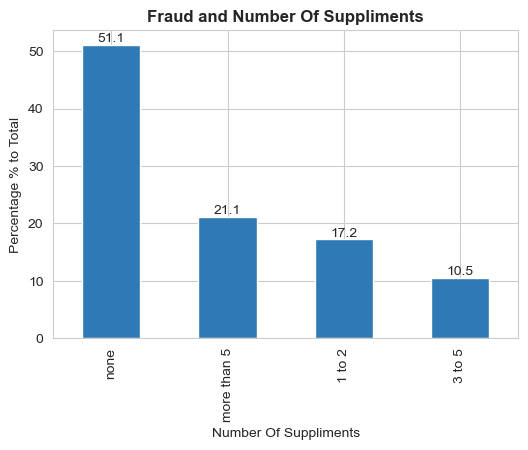

In [59]:
supplements = ((df_fraud['NumberOfSuppliments'].value_counts())/len(df_fraud['NumberOfSuppliments']))*100
print('Fraud by Number Of Suppliments')
print(supplements)

ax = supplements.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Number Of Suppliments')
plt.title('Fraud and Number Of Suppliments',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   

Fraud by Year
1994    44.312026
1995    32.611051
1996    23.076923
Name: Year, dtype: float64


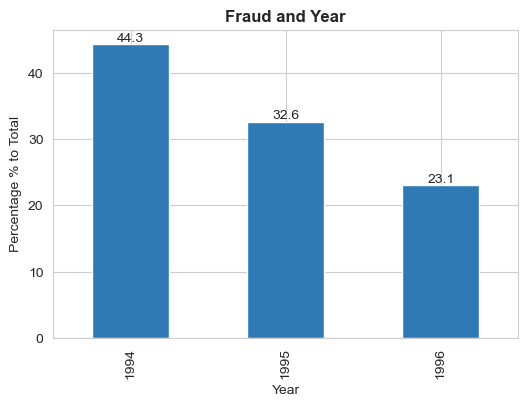

In [60]:
year=((df_fraud['Year'].value_counts())/len(df_fraud['Year']))*100
print('Fraud by Year')
print(year)

ax=year.plot(kind='bar')
plt.ylabel('Percentage % to Total')
plt.xlabel('Year')
plt.title('Fraud and Year',fontweight="bold")
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
plt.show()   


> 1994 had the highest fradulent claims. Claims decreased each year there after.

Fraud by Fault
Policy Holder    95.991333
Third Party       4.008667
Name: Fault, dtype: float64


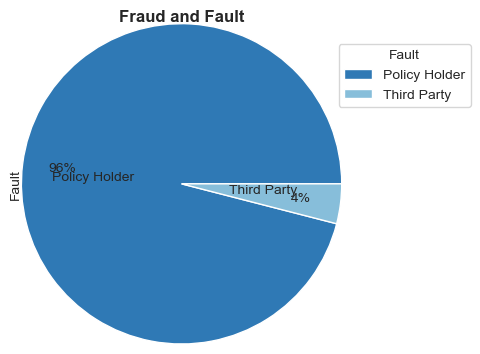

In [61]:
fault = ((df_fraud['Fault'].value_counts())/len(df_fraud['Fault']))*100
print('Fraud by Fault')
print(fault)


df_fraud.Fault.value_counts().plot(kind="pie", pctdistance=0.75, labeldistance=0.3,
                                        autopct='%1.0f%%', radius=1.3)
plt.title('Fraud and Fault',fontweight="bold")
plt.legend(loc=(1.01,.75), title='Fault'); 

> Irrelevant features are: 'AgentType', 'NumberOfSuppliments','AddressChange_Claim'

Sex                 Female      Male
DayOfWeekClaimed                    
Friday            0.085366  0.914634
Monday            0.148148  0.851852
Saturday          0.000000  1.000000
Sunday            0.333333  0.666667
Thursday          0.090278  0.909722
Tuesday           0.095960  0.904040
Wednesday         0.138298  0.861702


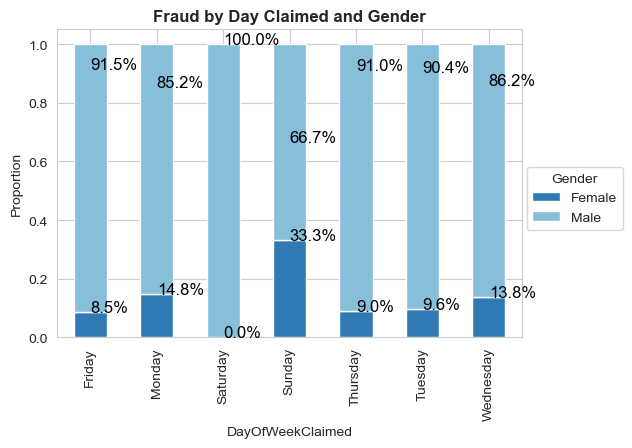

In [63]:
day_gender = pd.crosstab(df_fraud['DayOfWeekClaimed'],df_fraud['Sex'],normalize='index')
print(day_gender)

ax= day_gender.plot(kind = "bar", stacked=True)

plt.legend(loc=(1.01,.35), title='Gender')
plt.title('Fraud by Day Claimed and Gender',fontweight="bold")
plt.ylabel('Proportion')

for n, x in enumerate([*day_gender.index.values]):
    for proportion in day_gender.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)

plt.show()

Sex          Female      Male
Make                         
Accura     0.016949  0.983051
BMW        1.000000  0.000000
Chevrolet  0.127660  0.872340
Dodge      0.000000  1.000000
Ford       0.030303  0.969697
Honda      0.078212  0.921788
Mazda      0.138211  0.861789
Mecedes    0.000000  1.000000
Mercury    0.000000  1.000000
Nisson     0.000000  1.000000
Pontiac    0.145540  0.854460
Saab       0.090909  0.909091
Saturn     0.000000  1.000000
Toyota     0.139785  0.860215
VW         0.125000  0.875000


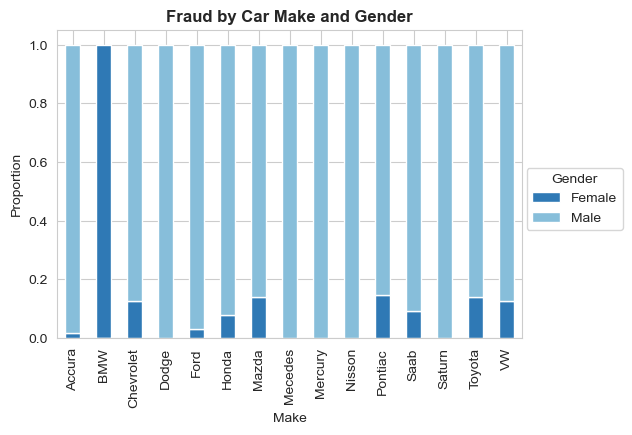

In [64]:
make_gender = pd.crosstab(df_fraud['Make'],df_fraud['Sex'],normalize='index')
print(make_gender)

ax= make_gender.plot(kind = "bar", stacked=True)#,width = 0.3,edgecolor = "black"

plt.legend(loc=(1.01,.35), title='Gender')
plt.title('Fraud by Car Make and Gender',fontweight="bold")
plt.ylabel('Proportion')
plt.show()

In [65]:
make_gender.columns.name, make_gender.index.name

('Sex', 'Make')

Sex                Female      Male
VehicleCategory                    
Sedan            0.119497  0.880503
Sport            0.119048  0.880952
Utility          0.000000  1.000000


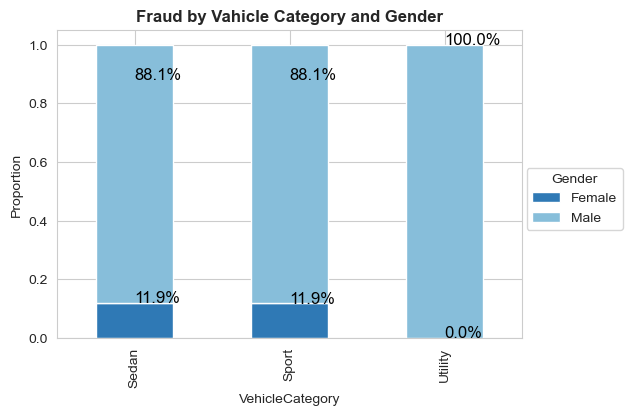

In [66]:
vehiclecat_gender = pd.crosstab(df_fraud['VehicleCategory'],df_fraud['Sex'],normalize='index')
print(vehiclecat_gender)

ax= vehiclecat_gender.plot(kind = "bar", stacked=True)

plt.legend(loc=(1.01,.35), title='Gender')
plt.title('Fraud by Vahicle Category and Gender',fontweight="bold")
plt.ylabel('Proportion')

for n, x in enumerate([*vehiclecat_gender.index.values]):
    for proportion in vehiclecat_gender.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100,1)}%', 
                 color="black",
                 fontsize=12)

plt.show()

Sex                Female      Male
VehicleCategory                    
Sedan            0.119497  0.880503
Sport            0.119048  0.880952
Utility          0.000000  1.000000


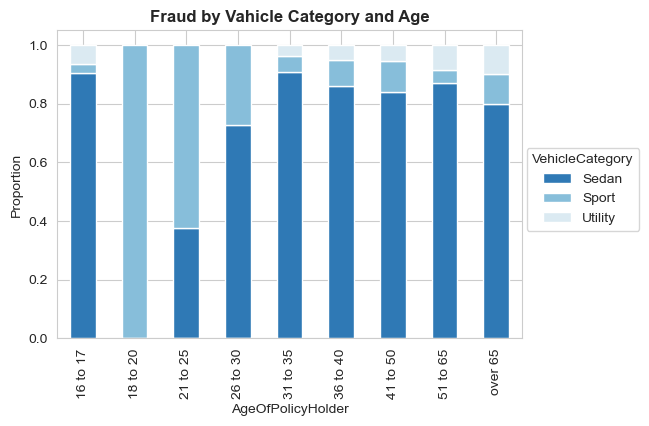

In [67]:
vehiclecat_age = pd.crosstab(df_fraud['AgeOfPolicyHolder'],df_fraud['VehicleCategory'],normalize='index')
print(vehiclecat_gender)

ax= vehiclecat_age.plot(kind = "bar", stacked=True)

plt.legend(loc=(1.01,.35), title='VehicleCategory')
plt.title('Fraud by Vahicle Category and Age',fontweight="bold")
plt.ylabel('Proportion')

plt.show()

Sex             Female      Male
DriverRating                    
1             0.099138  0.900862
2             0.121495  0.878505
3             0.123967  0.876033
4             0.110638  0.889362


Text(0, 0.5, 'Proportion')

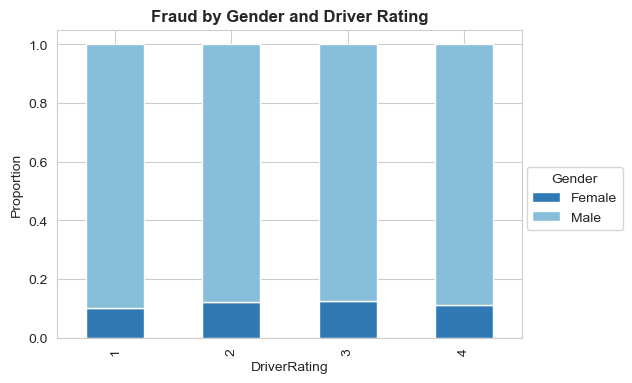

In [68]:
gender_rating = pd.crosstab(df_fraud['DriverRating'],df_fraud['Sex'],normalize='index')
print(gender_rating)

ax=gender_rating.plot(kind = "bar", stacked=True)

plt.legend(loc=(1.01,.35), title='Gender')
plt.title('Fraud by Gender and Driver Rating',fontweight="bold")
plt.ylabel('Proportion')

MaritalStatus  Divorced   Married    Single     Widow
DriverRating                                         
1              0.004310  0.693966  0.297414  0.004310
2              0.004673  0.696262  0.299065  0.000000
3              0.000000  0.681818  0.318182  0.000000
4              0.004255  0.697872  0.289362  0.008511


Text(0, 0.5, 'Proportion')

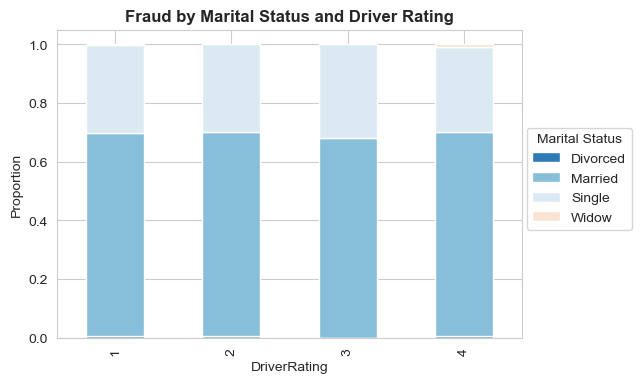

In [69]:
marital_rating = pd.crosstab(df_fraud['DriverRating'],df_fraud['MaritalStatus'],normalize='index')
print(marital_rating)

ax=marital_rating.plot(kind = "bar", stacked=True)

plt.legend(loc=(1.01,.35), title='Marital Status')
plt.title('Fraud by Marital Status and Driver Rating',fontweight="bold")
plt.ylabel('Proportion')

> Driver rating is unified among the marital status groups

In [70]:
pd.crosstab(df_fraud['FraudFound'],df_fraud['DriverRating'])

DriverRating,1,2,3,4
FraudFound,,,,
1,232,214,242,235


> Driver rating does not affect Fraudulent claims